In [1]:
#Data manipulation and Handeling libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#NMF
from sklearn.decomposition import NMF

#Clustering library
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

## Loading the data

In [2]:
df = pd.read_csv('spotify.xls', index_col = 0)

In [3]:
df.head()

,song_1,song_2,song_3,song_4,song_5,song_6,song_7,song_8,song_9,song_10,...,song_4991,song_4992,song_4993,song_4994,song_4995,song_4996,song_4997,song_4998,song_4999,song_5000
user_1,2,2,8,8,13,1,4,9,1,2,...,14,2,14,1,9,0,11,6,14,7
user_2,13,5,5,5,12,8,10,10,2,2,...,10,6,11,1,1,5,12,8,3,0
user_3,3,9,2,8,0,1,11,7,3,7,...,9,5,7,15,12,13,14,5,0,14
user_4,2,6,7,8,14,0,12,7,8,1,...,9,15,9,14,10,6,11,13,6,0
user_5,11,12,8,6,13,7,0,7,3,13,...,12,14,11,11,11,7,3,6,11,7


In [4]:
#we have build the ML model which will build the recommendation system for 1000 users.

In [5]:
df.shape

(1000, 5000)

### This dataset is of spotify as in Music player, Every row represents the user, So song 1 is heard by user 1, 2 times

In [6]:
#this is very small dataset in actual we will have songs in millions and users in millions
#this datset is quite unqiue with 5000 columns
#there should be no column unnamed.

In [7]:
x = df.values
x

array([[ 2,  2,  8, ...,  6, 14,  7],
       [13,  5,  5, ...,  8,  3,  0],
       [ 3,  9,  2, ...,  5,  0, 14],
       ...,
       [ 6,  2,  1, ..., 13,  6, 13],
       [ 7,  0,  8, ..., 11,  9, 12],
       [ 6, 15,  0, ..., 15,  4,  5]], dtype=int64)

In [8]:
#what did we do over here??
# we have ignored column heading and indices and converted dataset into 2*2 MATRIX

In [9]:
nmf = NMF(n_components = 100, max_iter = 1000, random_state = 3)

- n_components = generes in the dataset(features),in video example he has shown in two parameters(comedy, action) over here we are considering 100 genres for the music.
- max_iter = no of iterations allowed(usually we keep is as number of users= no of rows)

In [10]:
nmf.fit(x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


NMF(max_iter=1000, n_components=100, random_state=3)

In [11]:
user_matrix = nmf.transform(x)
song_matrix = nmf.components_.T

In [12]:
#S.M * (UM) in songs matrix what kind of music user likes
#in songs_matrix we have- for every genre what is rating for that song
#using dot matrix of this two table we can generate our original datasets.

In [14]:
user_matrix
#what do this numbers mean.? number of times the users heard that particular song
#no unit to this, 1.59- number of times the person has heard the song.

array([[1.59597279, 1.63144383, 0.        , ..., 0.        , 0.        ,
        0.08842005],
       [0.        , 1.37058116, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.25150672, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.86093206, ..., 0.        , 2.91063979,
        0.        ],
       [0.89111106, 0.55775866, 5.28815626, ..., 1.14447002, 0.        ,
        0.        ],
       [0.11437224, 0.3810454 , 1.17187612, ..., 0.        , 0.        ,
        0.        ]])

In [15]:
song_matrix
#100 genre, song1- genre 1 me kya score.?

array([[0.09154476, 0.02084876, 0.06170426, ..., 0.20525732, 0.02089963,
        0.42266527],
       [0.29410861, 0.        , 0.01635891, ..., 0.00535885, 0.25048781,
        0.28966942],
       [0.00182988, 0.16233797, 0.00882299, ..., 0.        , 0.0265591 ,
        0.15587654],
       ...,
       [0.37753494, 0.4043987 , 0.38341127, ..., 0.        , 0.49498818,
        0.        ],
       [0.        , 0.15106911, 0.        , ..., 0.34925875, 0.46747326,
        0.36724356],
       [0.09094906, 0.15572379, 0.        , ..., 0.30544496, 0.21424152,
        0.38353537]])

In [17]:
song_matrix.shape #5000 songs 100 genres, jazz, pop, rock, classical

(5000, 100)

In [18]:
user_matrix.shape

(1000, 100)

In [19]:
df.head()

,song_1,song_2,song_3,song_4,song_5,song_6,song_7,song_8,song_9,song_10,...,song_4991,song_4992,song_4993,song_4994,song_4995,song_4996,song_4997,song_4998,song_4999,song_5000
user_1,2,2,8,8,13,1,4,9,1,2,...,14,2,14,1,9,0,11,6,14,7
user_2,13,5,5,5,12,8,10,10,2,2,...,10,6,11,1,1,5,12,8,3,0
user_3,3,9,2,8,0,1,11,7,3,7,...,9,5,7,15,12,13,14,5,0,14
user_4,2,6,7,8,14,0,12,7,8,1,...,9,15,9,14,10,6,11,13,6,0
user_5,11,12,8,6,13,7,0,7,3,13,...,12,14,11,11,11,7,3,6,11,7


## Steps for building a recommendation system- type1- (for local library or small dataset)
1. consider Recommending songs to the first user(row location zero in user matrix)
2. Find the euclidean distance between this first user and the remaining 999 users.
3. Find out top 10 songs heard by nearest 5 users.
4. Recommend this 10 songs to the first user.

Calculating the distance between two users


In [20]:
#so here we will see how to calculate distance between two users
def col_dist(u1,u2):
    return pow(sum(pow(u1[x] - u2[x],2)for x in range(len(u1))), 0.5)

In [21]:
#distance less- they have same taste of music
#distance high- they have different taste of music

In [22]:
col_dist(user_matrix[0], user_matrix[1]) #using user matrix 0 I am extracting the first user and user matrix 1 deke we are extracting second user

17.066386600371928

In [23]:
def distance_from_remaining_users(buser, user_matrix):
    dist = []
    for i in range(len(user_matrix)):
        if buser != i:
            dist.append(col_dist(user_matrix[buser], user_matrix[i]))
    return dist

In [24]:
#now we wil store the distances
dist_user1 = distance_from_remaining_users(0, user_matrix)

In [28]:
dist_user1


[17.066386600371928,
 15.356075620685093,
 15.860626597220833,
 15.0854780384622,
 13.844410784062013,
 14.938304994509092,
 13.250608545970184,
 16.848370113786466,
 15.146562760132252,
 15.085160715715936,
 15.42611394735026,
 15.162198319370749,
 8.915369316489127,
 16.067019685715092,
 14.192876182521927,
 12.163103729972029,
 15.342023558150919,
 15.107063798249785,
 12.398262626272693,
 13.014577303418058,
 15.55835100808391,
 15.60633352998937,
 16.157732435950017,
 16.372436321883217,
 15.742562230797144,
 15.287379334888872,
 14.67893233165558,
 13.958180489078563,
 16.3537686288776,
 16.16795046327759,
 15.592805869213214,
 15.300255567303116,
 14.813458276242203,
 14.672279075849522,
 14.9663275265943,
 14.957592291190032,
 15.289917563396669,
 15.75105210041791,
 15.536270215086644,
 13.989176491859912,
 15.584294899339802,
 14.422344102764434,
 14.029914555145101,
 14.498613243929581,
 15.124960994546477,
 14.030779564033235,
 12.413550519932222,
 14.918957038104496,
 13.4

In [29]:
#distance of first user w.r.t each user
len(dist_user1)

999

In [30]:
#how we will get to know, which distance is from user0..??


## finding the nearest 5 users

In [31]:
#Now I will teach new concept basically new function over here, which will help us to get indexes based on the position
# so we will sort this, or sort karne ke baad we will get indexes rather than the number
# lets say 8.91 is the smallest number out of this list, iska i want the index number not the exact number

In [32]:
nearest_users = np.argsort(dist_user1)[:5]

In [33]:
for i in range(len(nearest_users)):
    nearest_users[i]+=1
nearest_users

array([ 13, 614, 666, 914, 395], dtype=int64)

In [34]:
#this are the first five users, 

### Finding the songs heard these users..??

In [35]:
#power back- just a min

In [36]:
for i in nearest_users:
    print('songs heard by user', i , 'are :')
    temp = df.iloc[i]
    print(temp[temp.values != 0].index)

songs heard by user 13 are :
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_6', 'song_7', 'song_8',
       'song_9', 'song_10', 'song_13',
       ...
       'song_4989', 'song_4990', 'song_4991', 'song_4992', 'song_4993',
       'song_4994', 'song_4995', 'song_4997', 'song_4998', 'song_5000'],
      dtype='object', length=4687)
songs heard by user 614 are :
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7',
       'song_8', 'song_9', 'song_10',
       ...
       'song_4991', 'song_4992', 'song_4993', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', length=4686)
songs heard by user 666 are :
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7',
       'song_8', 'song_9', 'song_10',
       ...
       'song_4991', 'song_4992', 'song_4993', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', lengt

- picking top 10 songs from above list of songs

### break for 15mins- 11.36am


In [44]:
def TopNsongs(nearest_users, df, N):
    temp = df.iloc[nearest_users]
    dict1 = temp.max().to_dict()
    #print(dict1)
    
    #converting every key value pair into a tuple and swapping them for sorting purpose, end result is a list of song and number of times heard tuple
    
    sorted_dict = sorted(dict1.items(), key = lambda keyvalue: (keyvalue[1], keyvalue[0]), reverse = True)[:N]
    #print(sorted_dict)
    #inside the tuple we are doing position swapping which means 12 ko first position pe rakha hai aur song 1 ko second position pe rakha hai
    
    return [x[0] for x in sorted_dict]


In [46]:
TopNsongs(nearest_users, df, 10)

['song_998',
 'song_990',
 'song_99',
 'song_988',
 'song_987',
 'song_986',
 'song_985',
 'song_982',
 'song_979',
 'song_968']

In [47]:
# you recomment this songs to the user 1,

### Type 2: recommendation system for Larger Dataset
- kmeans clustering

In [49]:
#To decide value of k which method do we use in Kmeans..??- elbow method-x axis- value of k y axis we have- wcss
#what do we do to find the best value of k in KNN..??

WCSS = {}
for k in range(1,50):
    kmeans = KMeans(n_clusters = k, max_iter=1000).fit(song_matrix)
    WCSS[k] = kmeans.inertia_
    
    #Inertia - how well a dataset was clustered by kmeans

In [50]:
WCSS

{1: 14072.226800905315,
 2: 13901.145745901988,
 3: 13773.980944984074,
 4: 13679.27346328558,
 5: 13595.692523470103,
 6: 13519.387843928436,
 7: 13457.444789314799,
 8: 13402.716373999188,
 9: 13357.279657951709,
 10: 13306.154050209443,
 11: 13269.963533891367,
 12: 13229.55779857731,
 13: 13202.067148067737,
 14: 13172.457452252384,
 15: 13143.018315913023,
 16: 13122.62588438146,
 17: 13102.389698915935,
 18: 13073.744165361719,
 19: 13055.619946154975,
 20: 13043.284729923565,
 21: 13023.094647702144,
 22: 13004.91563976694,
 23: 12985.804506663104,
 24: 12962.464456968268,
 25: 12957.936885620582,
 26: 12934.39214875016,
 27: 12923.744847717831,
 28: 12904.775791978143,
 29: 12892.031162359759,
 30: 12882.594566311533,
 31: 12861.791619561229,
 32: 12854.120889218935,
 33: 12847.037033643574,
 34: 12825.29109853128,
 35: 12822.338083815785,
 36: 12811.183952191646,
 37: 12789.014689620437,
 38: 12779.855511280286,
 39: 12769.490302400245,
 40: 12753.765498825713,
 41: 12745.1743

- Initially we had K=1, this is the sum of squared distances between each data point and centroid of the cluster, similarly we are increasing value of k, then sum of squared distance is decreasing.

Text(0, 0.5, 'WCSS')

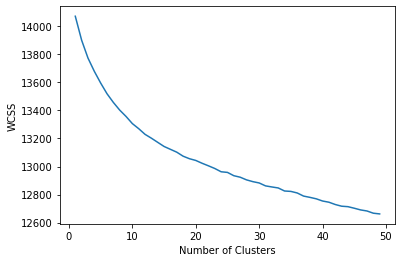

In [51]:
plt.plot(WCSS.keys(), WCSS.values())
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

### From elbow curve which value of no of clusters we should use..??

#### Song 1

In [72]:
def songs_in_cluster(N_clusters, df, song_matrix, song_name, n_recommendations):
    kmeans = KMeans(n_clusters = N_clusters, max_iter = 1000).fit(song_matrix)
    index_in_song = df.columnns.to_list().index(song_name)
    
    

In [73]:
df.columns

Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7',
       'song_8', 'song_9', 'song_10',
       ...
       'song_4991', 'song_4992', 'song_4993', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', length=5000)

In [74]:
df.columns.to_list()

['song_1',
 'song_2',
 'song_3',
 'song_4',
 'song_5',
 'song_6',
 'song_7',
 'song_8',
 'song_9',
 'song_10',
 'song_11',
 'song_12',
 'song_13',
 'song_14',
 'song_15',
 'song_16',
 'song_17',
 'song_18',
 'song_19',
 'song_20',
 'song_21',
 'song_22',
 'song_23',
 'song_24',
 'song_25',
 'song_26',
 'song_27',
 'song_28',
 'song_29',
 'song_30',
 'song_31',
 'song_32',
 'song_33',
 'song_34',
 'song_35',
 'song_36',
 'song_37',
 'song_38',
 'song_39',
 'song_40',
 'song_41',
 'song_42',
 'song_43',
 'song_44',
 'song_45',
 'song_46',
 'song_47',
 'song_48',
 'song_49',
 'song_50',
 'song_51',
 'song_52',
 'song_53',
 'song_54',
 'song_55',
 'song_56',
 'song_57',
 'song_58',
 'song_59',
 'song_60',
 'song_61',
 'song_62',
 'song_63',
 'song_64',
 'song_65',
 'song_66',
 'song_67',
 'song_68',
 'song_69',
 'song_70',
 'song_71',
 'song_72',
 'song_73',
 'song_74',
 'song_75',
 'song_76',
 'song_77',
 'song_78',
 'song_79',
 'song_80',
 'song_81',
 'song_82',
 'song_83',
 'song_84',
 

In [75]:
#so in this output, we have converted df.columns into a list.

In [76]:
df.columns.to_list().index('song_1') #what does it return index position of that song. now try for song 50

0

In [77]:
df.columns.to_list().index('song_50')

49

### step 2

In [78]:
def songs_in_cluster(N_clusters, df, song_matrix, song_name, n_recommendations):
    kmeans = KMeans(n_clusters = N_clusters, max_iter = 1000).fit(song_matrix)
    index_in_song = df.columnns.to_list().index(song_name)
    
    song_vector = song_matrix[index_in_song]

In [79]:
song_matrix[0] #what we are getting - we will get song_matrix[0] song 1 ka genre score,for all 100 genres

array([0.09154476, 0.02084876, 0.06170426, 0.16043611, 0.        ,
       0.06131838, 0.18931405, 0.09749339, 0.2224246 , 0.16705316,
       0.        , 0.29727018, 0.13969008, 0.07962902, 0.1892655 ,
       0.        , 0.03689208, 0.        , 0.36276012, 0.        ,
       0.31445647, 0.        , 0.02544176, 0.50223512, 0.29827251,
       0.48063687, 0.15079442, 0.08214941, 0.63532025, 0.1865195 ,
       0.2358654 , 0.        , 0.06978117, 0.10133733, 0.        ,
       0.        , 0.07151166, 0.2959685 , 0.35243299, 0.46729902,
       0.21736643, 0.        , 0.26953533, 0.        , 0.4071252 ,
       0.04928841, 0.        , 0.        , 0.43008926, 0.09874793,
       0.2185746 , 0.06493914, 0.00358172, 0.2722937 , 0.14997226,
       0.21636369, 0.        , 0.15256888, 0.33051371, 0.20155226,
       0.60086604, 0.21182491, 0.07841982, 0.        , 0.1499824 ,
       0.22487222, 0.        , 0.15141344, 0.19372056, 0.25236837,
       0.14610092, 0.18682026, 0.16414483, 0.        , 0.17060

### step 3


In [82]:
def songs_in_cluster(N_clusters, df, song_matrix, song_name, n_recommendations):
    kmeans = KMeans(n_clusters = N_clusters, max_iter = 1000).fit(song_matrix)
    index_in_song = df.columns.to_list().index(song_name)
    
    song_vector = song_matrix[index_in_song]
    
    all_songs_in_cluster = kmeans.predict(song_matrix)
    print(len(all_songs_in_cluster))

In [83]:
songs_in_cluster(15,df,song_matrix,'song_5', 5)

5000


In [84]:
#this ensures that all songs are part of any clusters

### Step 4

In [89]:
def songs_in_cluster(N_clusters, df, song_matrix, song_name, n_recommendations):
    kmeans = KMeans(n_clusters = N_clusters, max_iter = 1000).fit(song_matrix)
    index_in_song = df.columns.to_list().index(song_name)
    #print(index_in_song)
    
    song_vector = song_matrix[index_in_song]
    #print(song_vector)
    
    all_songs_in_cluster = kmeans.predict(song_matrix)
    #print(len(all_songs_in_cluster))
    
    #find songs which belongs to same cluster as of songs passed in song name

    songs_in_selected_cluster = [x for x in range(len(all_songs_in_cluster))
                                if all_songs_in_cluster[x] == kmeans.predict([song_vector])]
    
    
    #print len(songs_in_selected_cluster)
    
    song_cluster = song_matrix[songs_in_selected_cluster]
    
    neighbors = NearestNeighbors(n_neighbors = n_recommendations)
    
    #what wer are doing, for song5 we are finding nearest 5 songs,
    #this recommendation system(type2 ) it doesnt work on a user, 1 user se similar user find nahi kar raahe,
    #we are finding songs which are similar to that songs which user 1 is hearing
    #this you might have studied on wynk, or spotify, based on the user song history.
    
    
    neighbors.fit(song_cluster)
    recommended_songs = neighbors.kneighbors([song_matrix[index_in_song]])
    
    #song 5 ka jo vecor hoga that i am passing using this list and i am asking to find nearest k neighbors
    
    print(recommended_songs[1][0])
    
    
    #capstone 1 me kmeans use kiya tha yaad hai, we had 1030 clusters because we have 1030 record
    #similaryly over here we have 5000 songs, we are getting 5000 cluster valye, as in every song ka we have cluster value which 
    #cluster that song belongs to

In [90]:
songs_in_cluster(15, df, song_matrix,'song_5', 5)

[  0 284  59 273 217]


In [91]:
songs_in_cluster(15, df, song_matrix,'song_7', 5)

[  0  12   2 277 211]


In [92]:
songs_in_cluster(15, df, song_matrix,'song_67', 5)

[  6 242 290  34  32]


### In reality we have millions of songs, the music player follows this type of approach